In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pl.read_csv("Output_Data/agent_data.csv")
print(df.head())

shape: (5, 6)
┌───────────┬──────────┬──────────┬──────────────┬──────────────────┬─────────────────┐
│ Time_Step ┆ Agent_ID ┆ Behavior ┆ Microhabitat ┆ Body_Temperature ┆ Metabolic_State │
│ ---       ┆ ---      ┆ ---      ┆ ---          ┆ ---              ┆ ---             │
│ i64       ┆ i64      ┆ str      ┆ str          ┆ f64              ┆ f64             │
╞═══════════╪══════════╪══════════╪══════════════╪══════════════════╪═════════════════╡
│ 0         ┆ 800      ┆ null     ┆ null         ┆ 25.0             ┆ 345.761713      │
│ 0         ┆ 801      ┆ null     ┆ null         ┆ 25.0             ┆ 482.014514      │
│ 0         ┆ 802      ┆ null     ┆ null         ┆ 25.0             ┆ 520.933271      │
│ 0         ┆ 803      ┆ null     ┆ null         ┆ 25.0             ┆ 577.670554      │
│ 0         ┆ 804      ┆ null     ┆ null         ┆ 25.0             ┆ 333.971414      │
└───────────┴──────────┴──────────┴──────────────┴──────────────────┴─────────────────┘


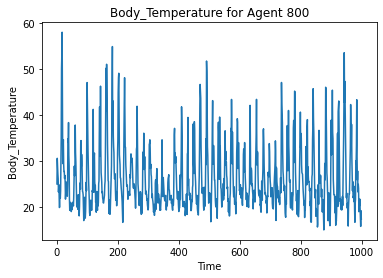

In [3]:
## Single snake
# Filter for the agent with ID 800
single_snake = df.filter(pl.col("Agent_ID") == 800)

# Extract columns as Numpy arrays
time = single_snake["Time_Step"].to_numpy()
values = single_snake["Body_Temperature"].to_numpy()

# Plot using Matplotlib
plt.plot(time, values)
plt.xlabel("Time")
plt.ylabel("Body_Temperature")
plt.title("Body_Temperature for Agent 800")
plt.show()


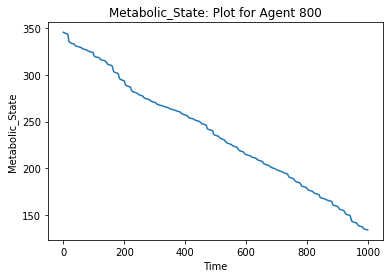

In [4]:
# Extract columns as Numpy arrays
time = single_snake["Time_Step"].to_numpy()
values = single_snake["Metabolic_State"].to_numpy()

# Plot using Matplotlib
plt.plot(time, values)
plt.xlabel("Time")
plt.ylabel("Metabolic_State")
plt.title("Metabolic_State: Plot for Agent 800")
plt.show()

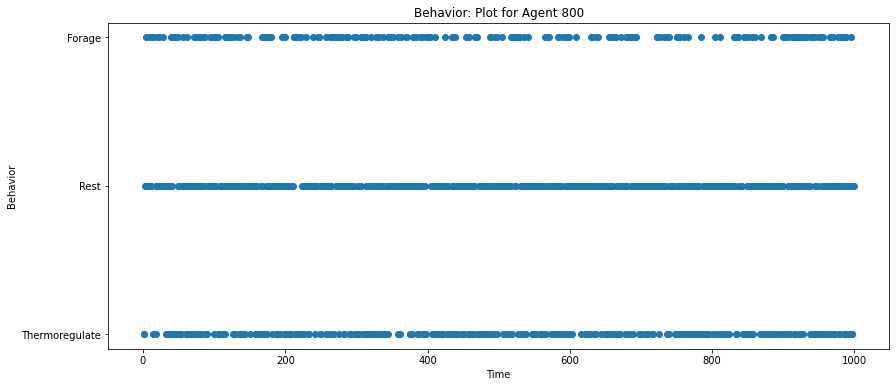

In [5]:
# Extract columns as Numpy arrays
single_snake = single_snake.drop_nulls()
time = single_snake["Time_Step"].to_numpy()
values = single_snake["Behavior"].to_numpy()

# Plot using Matplotlib
plt.figure(figsize=(14, 6))
plt.scatter(time, values)
plt.xlabel("Time")
plt.ylabel("Behavior")
plt.title("Behavior: Plot for Agent 800")
plt.show()

In [4]:
df = df.sort(["Agent_ID", "Time_Step"])

df_pd = df.to_pandas()

# Now you can proceed with the Pandas approach
import pandas as pd

# Shift the 'Behavior' column within each agent group to get the previous behavior
df_pd['previous_state'] = df_pd.groupby("Agent_ID")['Behavior'].shift(1)

# Filter out rows where the previous state is null (i.e., the first time step for each agent)
df_filtered = df_pd[df_pd['previous_state'].notnull()]

# Count transitions
transitions = df_filtered.groupby(["previous_state", "Behavior"]).size().reset_index(name="transition_count")

# Calculate total transitions from each previous state
total_transitions = transitions.groupby("previous_state")["transition_count"].sum().reset_index(name="total_transitions")

# Merge to get transition probabilities
transition_probabilities = transitions.merge(total_transitions, on="previous_state")
transition_probabilities["transition_probability"] = (
    transition_probabilities["transition_count"] / transition_probabilities["total_transitions"]
)

print(transition_probabilities)

   previous_state        Behavior  transition_count  total_transitions  \
0          Forage          Forage              8095              40395   
1          Forage            Rest             20109              40395   
2          Forage  Thermoregulate             12191              40395   
3            Rest          Forage             20113              99367   
4            Rest            Rest             49461              99367   
5            Rest  Thermoregulate             29793              99367   
6  Thermoregulate          Forage             12188              59838   
7  Thermoregulate            Rest             29807              59838   
8  Thermoregulate  Thermoregulate             17843              59838   

   transition_probability  
0                0.200396  
1                0.497809  
2                0.301795  
3                0.202411  
4                0.497761  
5                0.299828  
6                0.203683  
7                0.498128  
8      

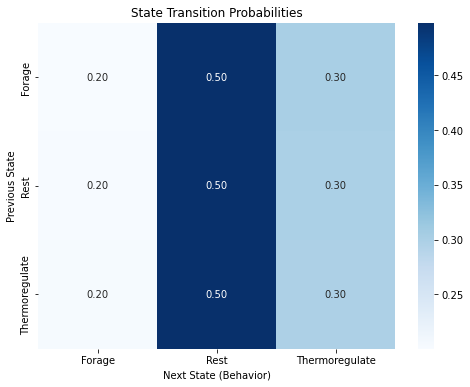

In [6]:
# This could be a good test
import seaborn as sns

heatmap_data = transition_probabilities.pivot(index="previous_state", columns="Behavior", values="transition_probability")

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".2f")
plt.title("State Transition Probabilities")
plt.xlabel("Next State (Behavior)")
plt.ylabel("Previous State")
plt.show()